<a href="https://www.kaggle.com/code/aneeshdighe/rohit-sharma-data-analysis?scriptVersionId=138205193" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rohit-sharma-all-international-cricket-centuries/Rohit-Sharma-All-International-Cricket-Centuries.csv


In [31]:
data=pd.read_csv('/kaggle/input/rohit-sharma-all-international-cricket-centuries/Rohit-Sharma-All-International-Cricket-Centuries.csv')
data.head()

,No.,Score,Against,Position,Innings,Venue,Ground,Date,Result
0,1,114,Zimbabwe,4,1,"Queens Sports Club, Bulawayo",Away,28-May-10,Lost
1,2,101*,Sri Lanka,4,2,"Queens Sports Club, Bulawayo",Neutral,30-May-10,Won
2,3,141*,Australia,1,2,"Sawai Mansingh Stadium, Jaipur",Home,16-Oct-13,Won
3,4,209,Australia,1,1,"M. Chinnaswamy Stadium, Bangalore",Home,02-Nov-13,Won
4,5,177,West Indies,6,2,"Eden Gardens, Kolkata",Home,06-Nov-13,Won


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No.       43 non-null     int64 
 1   Score     43 non-null     object
 2   Against   43 non-null     object
 3   Position  43 non-null     int64 
 4   Innings   43 non-null     int64 
 5   Venue     43 non-null     object
 6   Ground    43 non-null     object
 7   Date      43 non-null     object
 8   Result    43 non-null     object
dtypes: int64(3), object(6)
memory usage: 3.1+ KB


In [33]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Result of matches-Century')

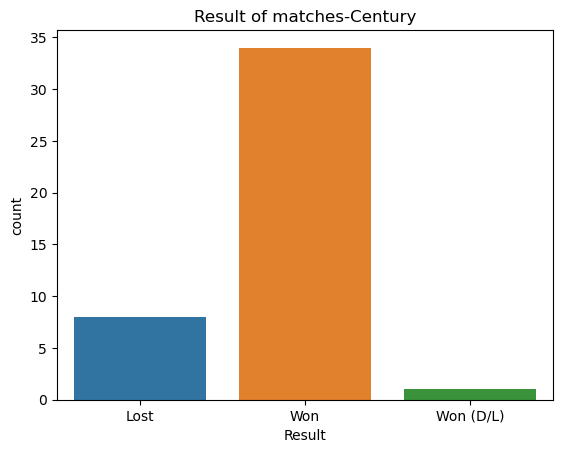

In [34]:
sns.countplot(x=data['Result'])
plt.title("Result of matches-Century")

Text(0.5, 1.0, 'What does he prefer? Home/Away/Neutral')

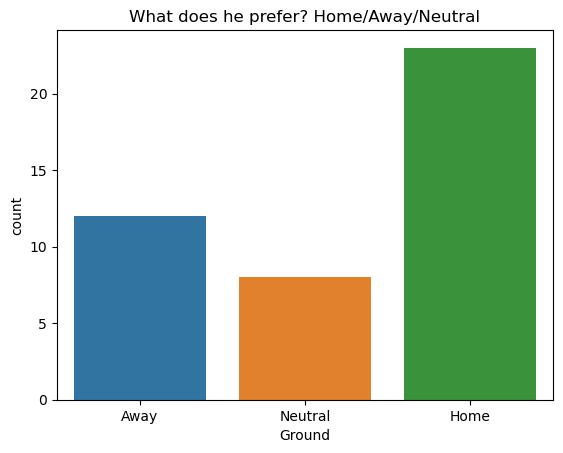

In [35]:
sns.countplot(x=data['Ground'])
plt.title('What does he prefer? Home/Away/Neutral')

Text(0.5, 1.0, 'TOP/MIDDLE/LOWER Batsman?')

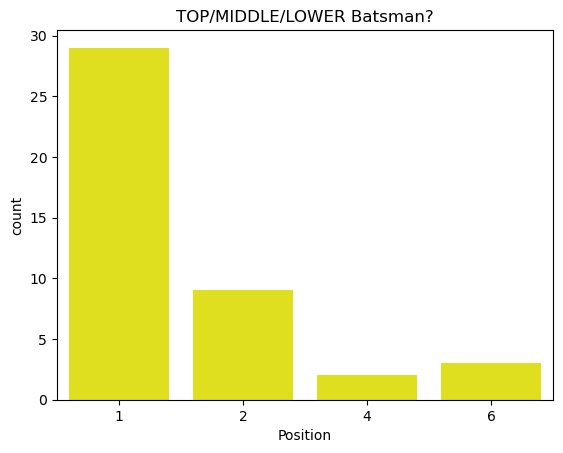

In [36]:
sns.countplot(x=data['Position'],color='yellow')
plt.title('TOP/MIDDLE/LOWER Batsman?')

In [39]:
data['Score']=data['Score'].str.replace('*','')
data.head()

,No.,Score,Against,Position,Innings,Venue,Ground,Date,Result
0,1,114,Zimbabwe,4,1,"Queens Sports Club, Bulawayo",Away,28-May-10,Lost
1,2,101,Sri Lanka,4,2,"Queens Sports Club, Bulawayo",Neutral,30-May-10,Won
2,3,141,Australia,1,2,"Sawai Mansingh Stadium, Jaipur",Home,16-Oct-13,Won
3,4,209,Australia,1,1,"M. Chinnaswamy Stadium, Bangalore",Home,02-Nov-13,Won
4,5,177,West Indies,6,2,"Eden Gardens, Kolkata",Home,06-Nov-13,Won


In [41]:
data['Score']=pd.to_numeric(data['Score'],errors='coerce')
data.dtypes

No.          int64
Score        int64
Against     object
Position     int64
Innings      int64
Venue       object
Ground      object
Date        object
Result      object
dtype: object

In [44]:
data['Date']=pd.to_datetime(data['Date'],dayfirst=True)
data.dtypes

No.                  int64
Score                int64
Against             object
Position             int64
Innings              int64
Venue               object
Ground              object
Date        datetime64[ns]
Result              object
dtype: object

In [45]:
data.head(3)

,No.,Score,Against,Position,Innings,Venue,Ground,Date,Result
0,1,114,Zimbabwe,4,1,"Queens Sports Club, Bulawayo",Away,2010-05-28,Lost
1,2,101,Sri Lanka,4,2,"Queens Sports Club, Bulawayo",Neutral,2010-05-30,Won
2,3,141,Australia,1,2,"Sawai Mansingh Stadium, Jaipur",Home,2013-10-16,Won


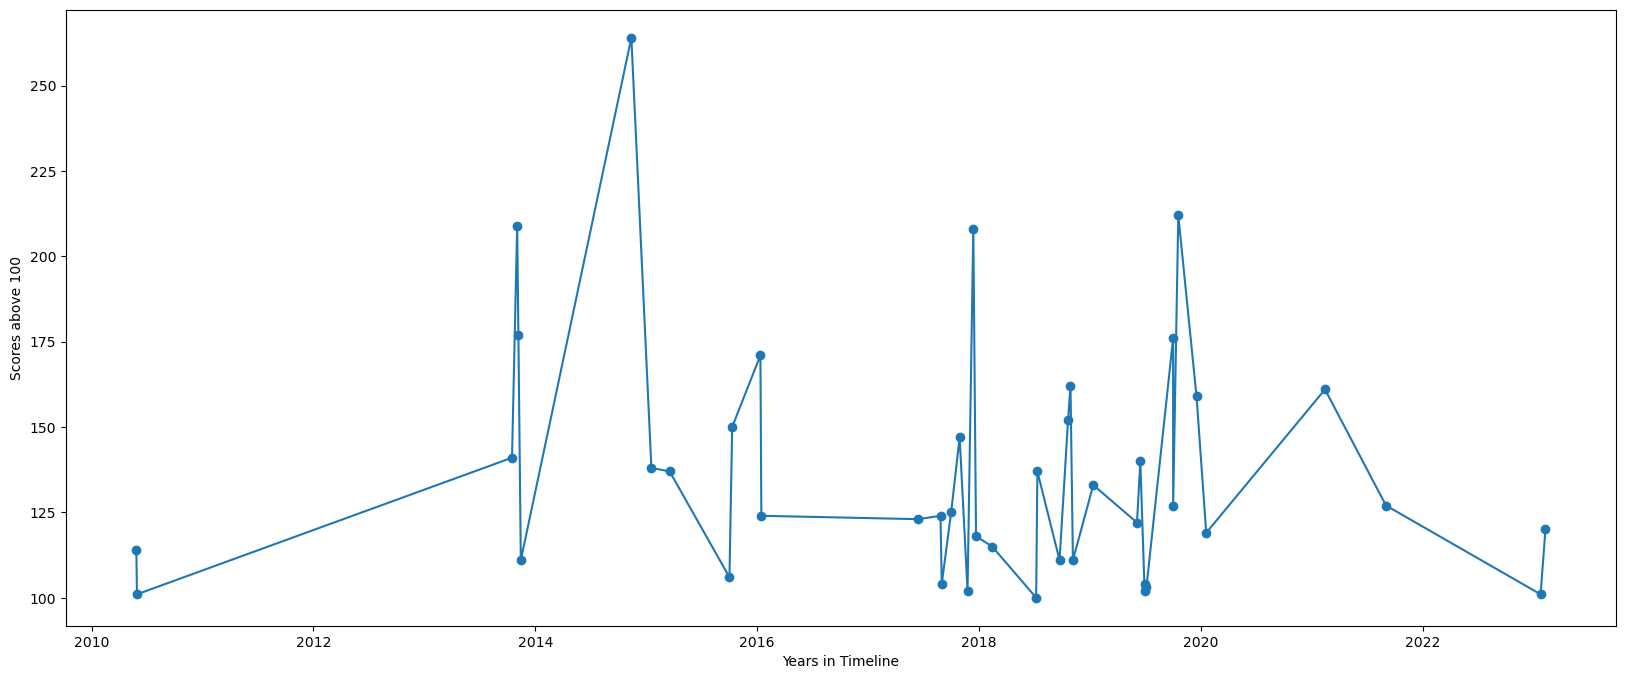

In [67]:
plt.figure(figsize=(20,8))
plt.plot(data['Date'],data['Score'],marker='o')
plt.xlabel('Years in Timeline')
plt.ylabel('Scores above 100')
plt.show()

Text(0.5, 1.0, 'Distribution of Scores across positions')

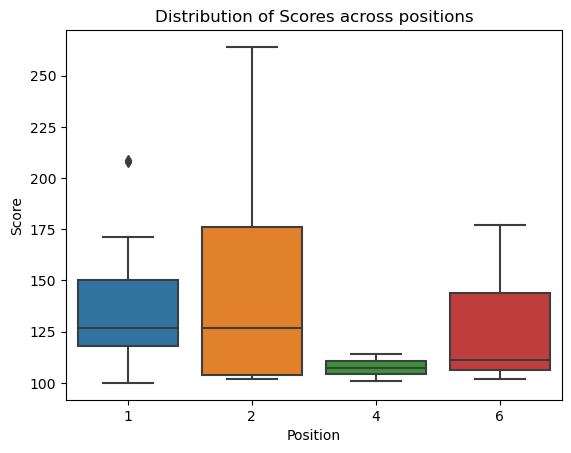

In [52]:
sns.boxplot(x=data['Position'],y=data['Score'])
plt.xlabel('Position')
plt.ylabel('Score')
plt.title('Distribution of Scores across positions')

Text(0.5, 1.0, 'Distribution of Scores across positions')

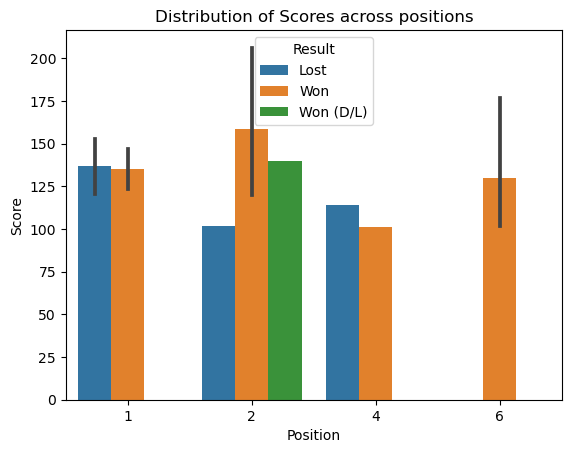

In [54]:
sns.barplot(x=data['Position'],y=data['Score'],hue=data['Result'])
plt.xlabel('Position')
plt.ylabel('Score')
plt.title('Distribution of Scores across positions')

Text(0.5, 1.0, 'Distribution of Scores across positions')

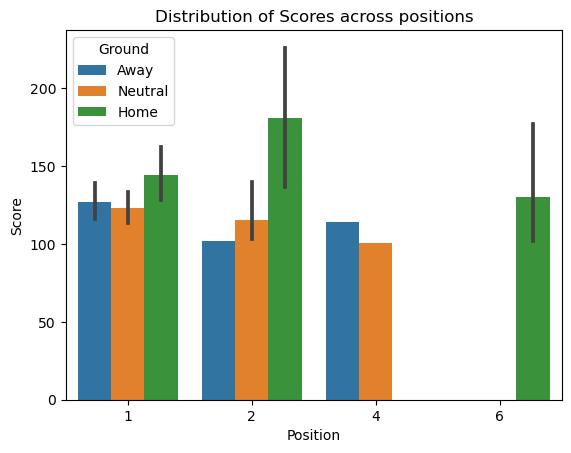

In [55]:
sns.barplot(x=data['Position'],y=data['Score'],hue=data['Ground'])
plt.xlabel('Position')
plt.ylabel('Score')
plt.title('Distribution of Scores across positions')

In [57]:
countries=data['Against'].value_counts()
countries

 Australia       9
 Sri Lanka       8
 South Africa    7
 West Indies     6
 England         5
 Bangladesh      3
 New Zealand     2
 Pakistan        2
 Zimbabwe        1
Name: Against, dtype: int64

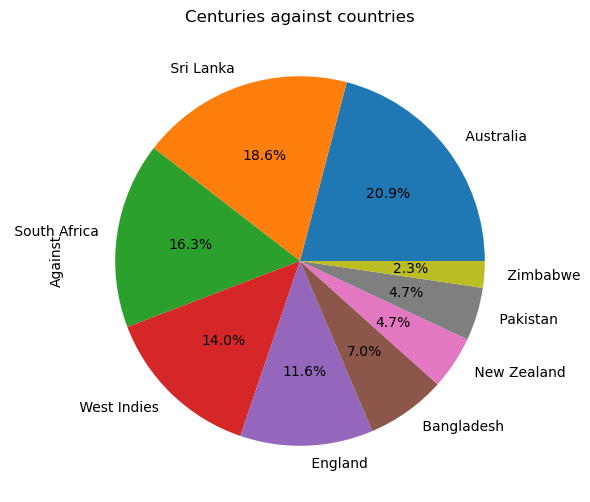

In [59]:
plt.figure(figsize=(12,6))
countries.plot(kind='pie',autopct="%1.1f%%")
plt.title('Centuries against countries')
plt.show()

Text(0.5, 1.0, 'Distribution of Score wrt Innings')

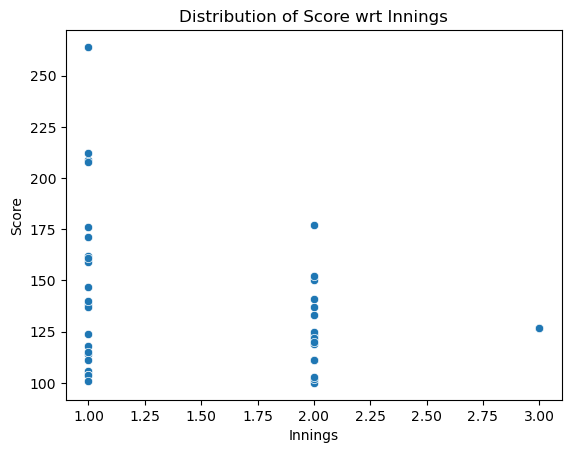

In [65]:
sns.scatterplot(x=data['Innings'],y=data['Score'])
plt.title('Distribution of Score wrt Innings')

Text(0.5, 1.0, 'Distribution of Score wrt Position and their result')

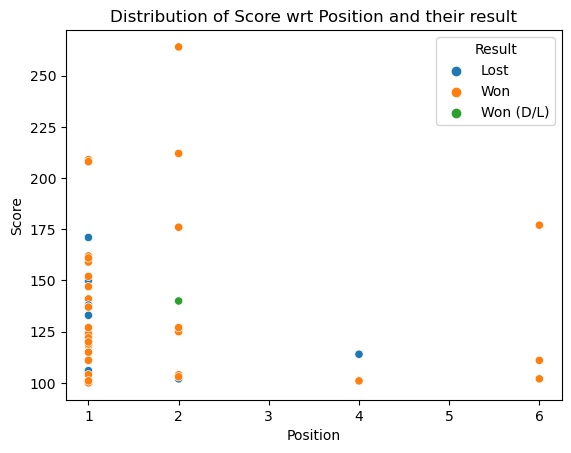

In [73]:
sns.scatterplot(x=data['Position'],y=data['Score'],hue=data['Result'])
plt.title('Distribution of Score wrt Position and their result')

Text(0.5, 1.0, "Timeline of Rohit Sharma's Centuries")

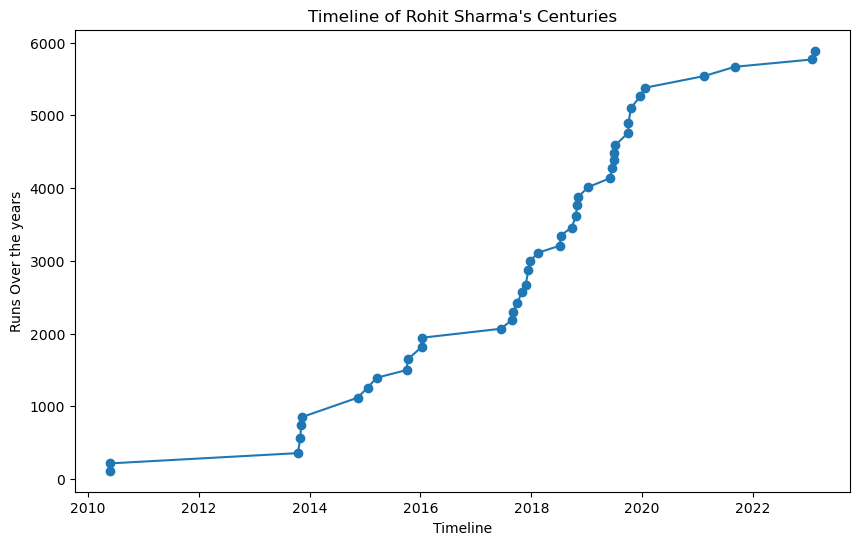

In [81]:
data['Total']=data['Score'].cumsum()
plt.figure(figsize=(10,6))
plt.plot(data['Date'],data['Total'],marker='o')
plt.xlabel('Timeline')
plt.ylabel('Runs Over the years')
plt.title("Timeline of Rohit Sharma's Centuries")

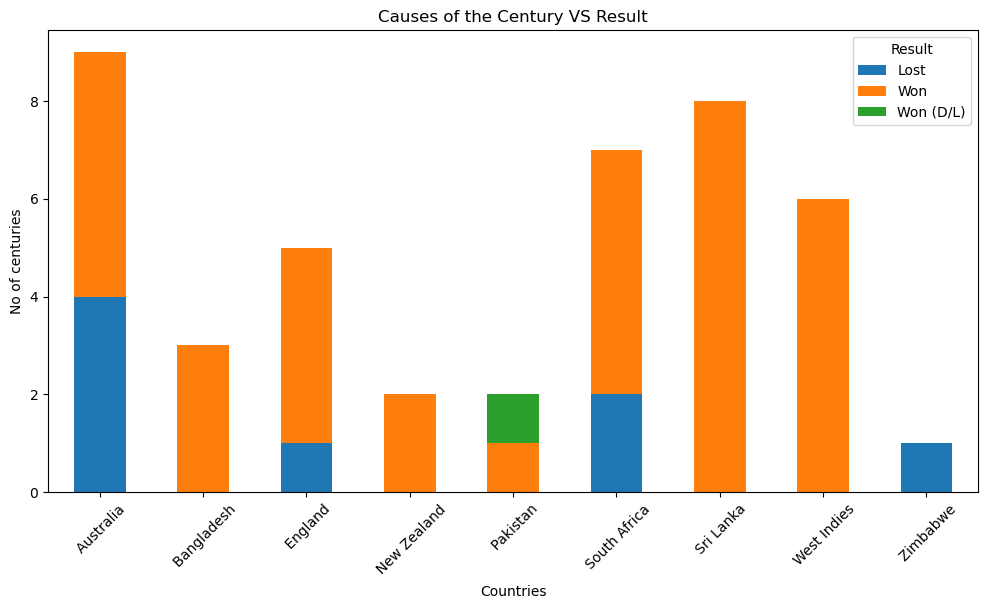

In [83]:
result=data.groupby(['Against','Result']).size().unstack()
result.plot(kind='bar',stacked=True,figsize=(12,6))
plt.xlabel('Countries')
plt.ylabel('No of centuries')
plt.title('Causes of the Century VS Result')
plt.xticks(rotation=45)
plt.show()

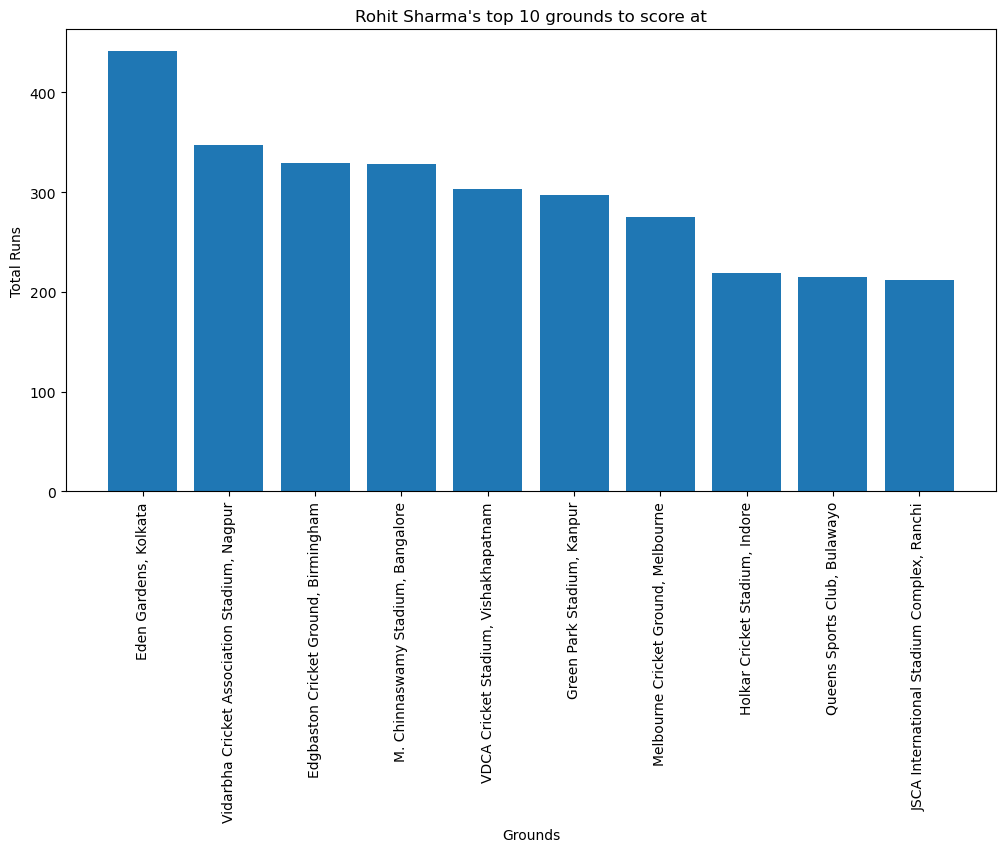

In [90]:
grounds=data.groupby('Venue')['Score'].sum()
top10grounds=grounds.sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.bar(top10grounds.index,top10grounds.values)
plt.xlabel('Grounds')
plt.ylabel('Total Runs')
plt.xticks(rotation=90)
plt.title("Rohit Sharma's top 10 grounds to score at")
plt.show()

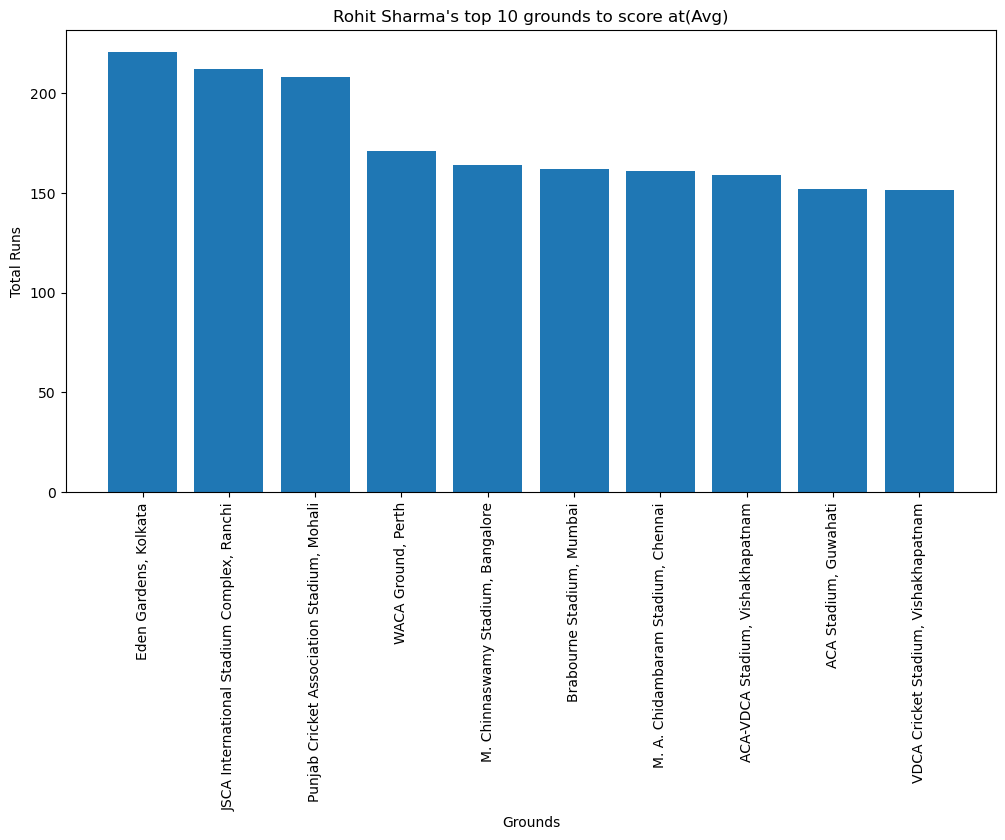

In [94]:
grounds=data.groupby('Venue')['Score'].mean()
top10grounds=grounds.sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.bar(top10grounds.index,top10grounds.values)
plt.xlabel('Grounds')
plt.ylabel('Total Runs')
plt.xticks(rotation=90)
plt.title("Rohit Sharma's top 10 grounds to score at(Avg)")
plt.show()